English version please read"Preprocessing of data.ipynb"本文件用于简单演示如何使用shiningspectrum来对光谱数据进行预处理。

In [3]:
# 从shiningspectrum中导入pretreatment
from shiningspectrum import pretreatment

import matplotlib.pyplot as plt
import numpy as np

为了方便演示，我们来构建一组数据。

In [25]:
x = np.linspace(0, 2000, 4000)

# 制作六个峰
p1 = 30.0 * np.exp(-np.log(2) * ((x-250.0)/6.0)**2)
p2 = 40.0 * np.exp(-np.log(2) * ((x-700.0)/40.0)**2)
p3 = 30.0 * np.exp(-np.log(2) * ((x-1000.0)/30.0)**2)
p4 = 60.0 * np.exp(-np.log(2) * ((x-1300.0)/2.0)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-1600.0)/3.0)**2)
p6 = 40.0 * np.exp(-np.log(2) * ((x-1700.0)/5.0)**2)

# 制作背景
bkg = 60.0 * np.exp(-np.log(2) * ((x-800.0)/800.0)**2) + 0.03*x

# 加入噪声
noise = 1.0 * np.random.normal(size=4000)

# 合成
y = p1 + p2 + p3 + p4 + p5 + p6 + noise + bkg

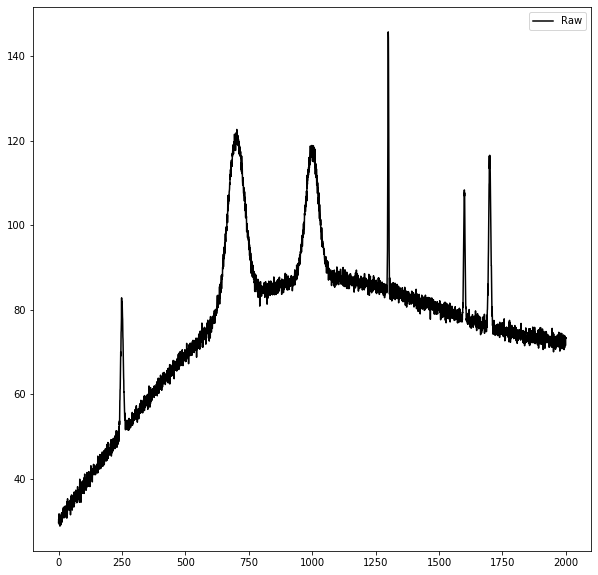

In [26]:
plt.figure(figsize=(10,10))
plt.plot(x,y,"k-",label="Raw")
plt.legend()

我们来使用pretreatment.autbaseline函数来去除基线，并绘图看看效果。

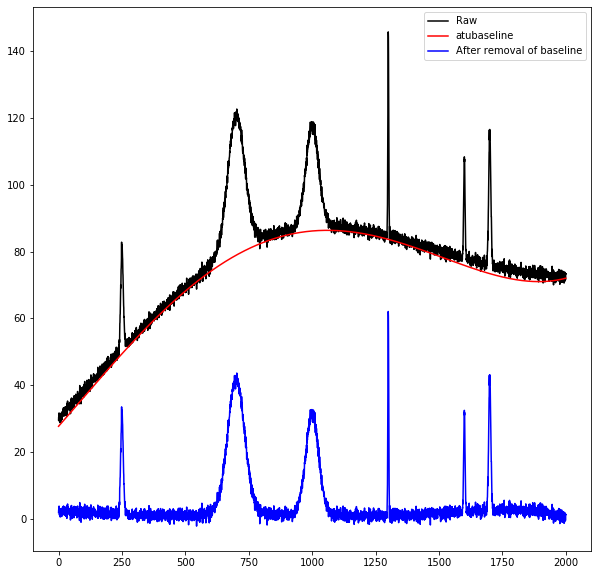

In [27]:
x, y_r, y_base = pretreatment.autbaseline(x,y, deg=4, max_it=200,tol=None)
plt.figure(figsize=(10,10))
plt.plot(x,y,"k-",label="Raw")
plt.plot(x,y_base,"r-",label="atubaseline")

plt.plot(x,y_r,"b-",label="After removal of baseline")
plt.legend()

我们来使用pretreatment.smooth函数来去除基线，并绘图看看效果。

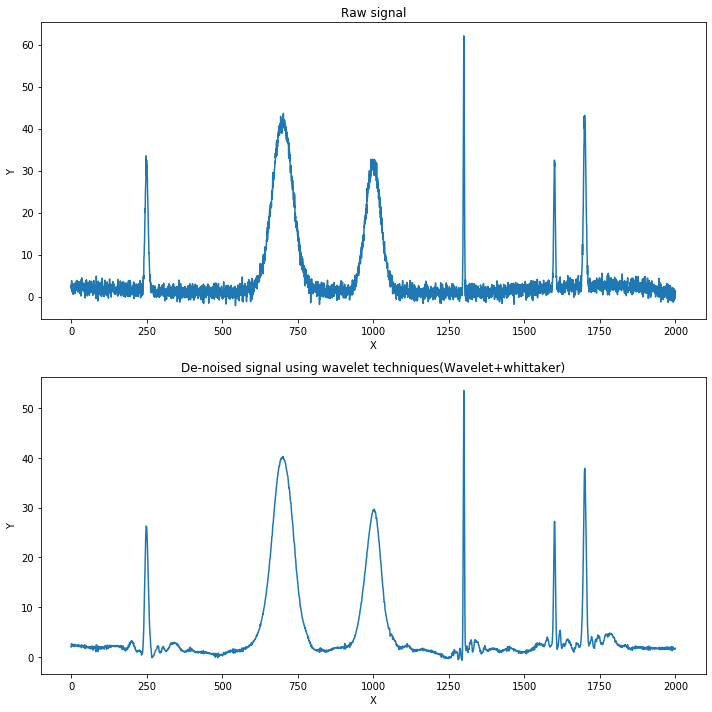

In [28]:
x, y_denoising=pretreatment.smooth(x, y_r, Lambda=10 ** 0.5, threshold=0.07)
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(x,y_r )
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Raw signal")
plt.subplot(2, 1, 2)
plt.plot(x, y_denoising)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("De-noised signal using wavelet techniques(Wavelet+whittaker)")

plt.tight_layout()
plt.show()

顺便简单看一下shiningspectrum的寻峰功能

In [29]:
#导入peak_processing
from shiningspectrum import peak_processing

[(249.0622655663916, 26.26791977053623), (700.6751687921981, 40.280079117788596), (1003.2508127031758, 29.67068245456457), (1299.82495623906, 53.55308595217183), (1599.8999749937486, 27.2444498864253), (1699.9249812453115, 37.90064728448384)]


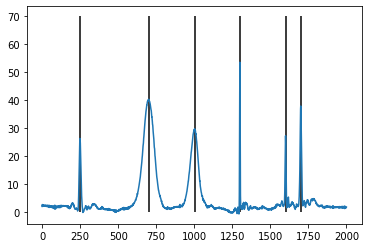

In [32]:
#寻峰功能主义由peak_processing.search_peaks函数实现
peaks = peak_processing.search_peaks(x, y_denoising, height=0.1, distance=10)

plt.plot(x, y_denoising)
print(peaks)
for i in peaks:    
    plt.vlines(i[0], 0, 70)